<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

- **Clean Up Data and Perform Exploratory Data Analysis**

**Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.**

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [3]:
# Make the features and target into a DataFrame called boston
df_boston = pd.concat([X,y],axis = 'columns')
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# Shape of the feature columns:
df_boston.shape

(506, 14)

In [5]:
# Data types of the DataFrame columns:
df_boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [6]:
# Count of null values by column
df_boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Basic summary statistics
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# Number of unique values for each column
for col in df_boston.columns:
    print(col+': '+str(len(df_boston[col].unique())))

CRIM: 504
ZN: 26
INDUS: 76
CHAS: 2
NOX: 81
RM: 446
AGE: 356
DIS: 412
RAD: 9
TAX: 66
PTRATIO: 46
B: 357
LSTAT: 455
MEDV: 229


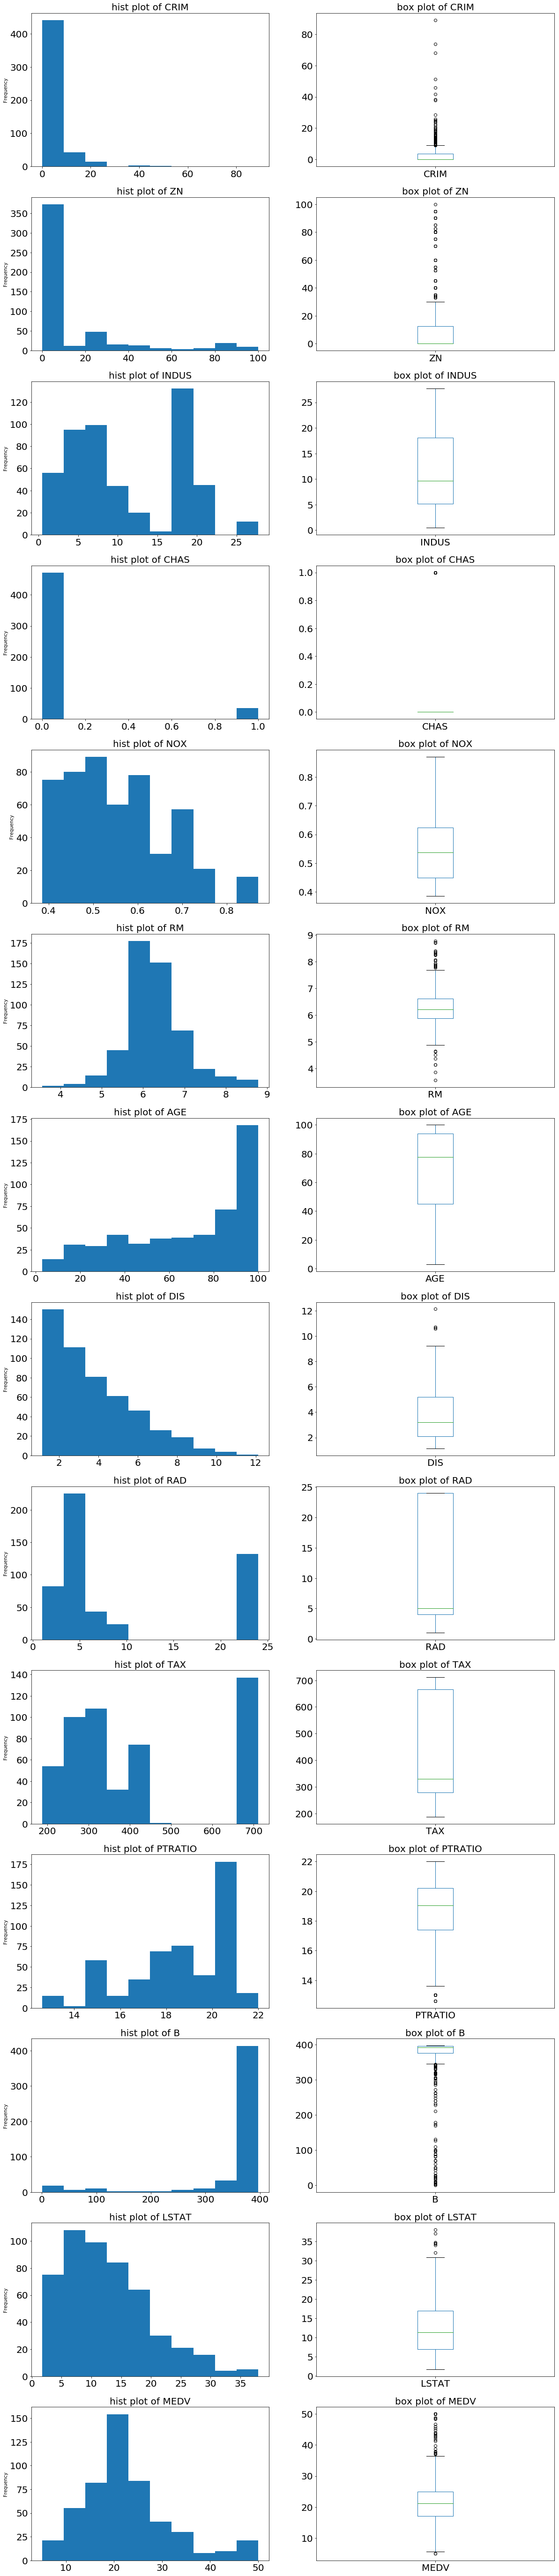

In [9]:
# Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)

plot_types = ['hist','box']
fig, axes = plt.subplots(len(df_boston.columns),len(plot_types),figsize=(20,100))
fontsize=20

for col,ax_row in zip(df_boston.columns,axes):
    for ax,plot_type in zip(ax_row,plot_types):
        df_boston[col].plot(kind=plot_type,ax=ax)
        ax.tick_params(labelsize=fontsize)
        ax.set_title(plot_type+' plot of '+col,fontsize=fontsize)
    

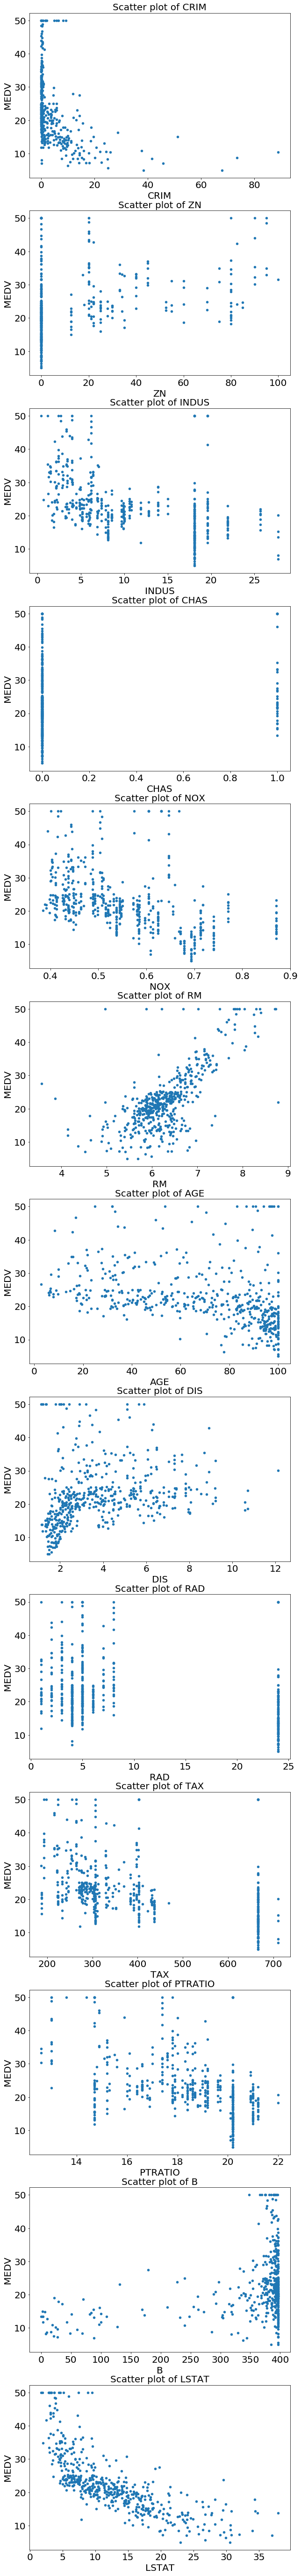

In [10]:
# Scatterplot of each column with median price
cols = df_boston.columns.drop('MEDV')

fig, axes = plt.subplots(len(df_boston.columns)-1,1,figsize=(10,100))
fontsize=20

for col,ax in zip(cols,axes):
    df_boston.plot(x=col,y='MEDV',kind='scatter',ax=ax)
    ax.set_title('Scatter plot of '+col,fontsize=fontsize)
    ax.set_xlabel(col,fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.set_ylabel('MEDV',fontsize=fontsize)

- **Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)**

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [12]:
# Without a train test split:
y_null = np.zeros(len(df_boston))+df_boston['MEDV'].mean()
mse_null = mean_squared_error(y_pred=y_null,y_true=y)
print('MSE of model WITHOUT a train test split '+ str(mse_null))

# With a train test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.7,random_state=1)
y_null2 = np.zeros(len(y_test))+float(y_train.mean())
mse_null_tts = mean_squared_error(y_pred=y_null2,y_true=y_test)
print('MSE of model WITH a train test split '+ str(mse_null_tts))

MSE of model WITHOUT a train test split 84.41955615616554
MSE of model WITH a train test split 92.06717299928938


C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


- **Develop a linear regression model to predict MEDV. Train it on 70% of the data. Get~~s~~ its MSE on both that 70% and the other 30%.**

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Using all the features
feature_cols = df_boston.columns.drop('MEDV')
X=df_boston[feature_cols]
y=df_boston['MEDV']


X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.7,random_state=1)

lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mse_train = mean_squared_error(y_pred=y_pred_train, y_true=y_train)
mse_test = mean_squared_error(y_pred=y_pred_test, y_true=y_test)

print('MSE of the training data: '+ str(mse_train))
print('MSE of the test data: '+ str(mse_test))

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


MSE of the training data: 23.51758514599279
MSE of the test data: 19.82960924860523


- **K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.**

In [15]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [16]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

mse_train = -cross_val_score(lr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
mse_test = -cross_val_score(lr, X_test, y_test, cv=kf, scoring='neg_mean_squared_error').mean()

print(mse_train)
print(mse_test)

26.51057543125328
19.709165536577427


- **How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?**

Linear regression model training MSE: ~26   
Null model MSE: ~84 to 92   

---
This linear regression model performed better on the training data than the null model. This means that the bias of the linear regression model is lower than the null model. It is better at describing the data.

- **How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?**

The MSEs of the predicted values generated from the training and test set are pretty close (26 and 19 for the training and test sets repectively). This indicates that the variance of the model is low.

   - **How much of a bias problem does your model appear to have? Why do you say that?**

In [17]:
# find the R squared of the model to learn more about its bias:
from sklearn.metrics import r2_score
R2_lr = r2_score(y_pred=y_pred_test,y_true=y_test)
R2_lr

0.7836482437943217

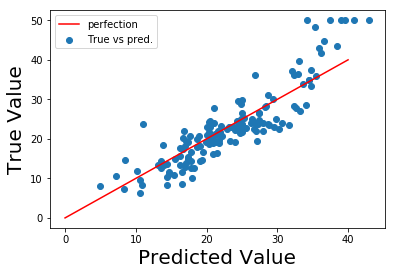

In [18]:
# What does our error look like?
fig,ax=plt.subplots()
fontsize=20
ax.scatter(y_pred_test,y_test,label='True vs pred.')
ax.plot([0,40],[0,40],label='perfection',color='r')
ax.set_xlabel('Predicted Value',fontsize=fontsize)
ax.set_ylabel('True Value',fontsize=fontsize)
leg=ax.legend()

This linear regression model has a bit of a bias problem as it does not seem to capture the higher valued housing prices (MEDV > ~40) as well as it does the lower valued homes as indicated by the plot above.

- **How much of a variance problem does your model appear to have? Why do you say that?**

The model does not appear to have a variance problem due to the similar MSEs calculated between the training and test data sets. If the variance were too high, I would expect a much lower MSE calculated for the training set than the test set. This does not appear to be the case.

- **Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?**

I will add more flexibility to reduce the bias observed for the more expensive housing. To do this, columns are added of the poly transforms of the features that are best correlated with the most expensive housing.

---
This model is worse than the original with higher MSE for both the training and test sets. This model has a slightly higher R2 but appears not much better at predicting the higher values housing.

In [19]:
# find the features most correlated with the most expensive housing:

# filter for the most expensive houing where the model is the worst
# All boston housing is expensive (amirite?), but you know what I mean.
df_boston_expensive = df_boston[df_boston['MEDV']>40] 
df_boston_expensive.corr()['MEDV'].sort_values(ascending=False)

MEDV       1.000000
CRIM       0.383937
CHAS       0.343007
AGE        0.339475
RAD        0.327220
INDUS      0.310548
NOX        0.310421
TAX        0.301467
LSTAT      0.137146
PTRATIO    0.104978
ZN        -0.052388
RM        -0.101927
B         -0.159712
DIS       -0.402591
Name: MEDV, dtype: float64

The most correlated appears to be DIS and CRIM

In [20]:
# CRIM is modified here because it is an index for which lower values are correlated with higher valued housing.
df_boston['CRIM']= 1/df_boston['CRIM']
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,158.227848,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,36.616624,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,36.643459,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,30.892802,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,14.482259,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

# Features to transform:
trans_features = ['DIS','CRIM']

poly_feats = poly.fit_transform(df_boston[trans_features])
poly_X = pd.DataFrame(poly_feats)
pdf = pd.merge(df_boston,poly_X, right_index=True, left_index=True)
pdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,0,1,2,3,4,5
0,158.227848,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1.0,4.0900,158.227848,16.728100,647.151899,25036.051915
1,36.616624,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1.0,4.9671,36.616624,24.672082,181.878433,1340.777149
2,36.643459,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1.0,4.9671,36.643459,24.672082,182.011726,1342.743098
3,30.892802,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1.0,6.0622,30.892802,36.750269,187.278344,954.365214
4,14.482259,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,1.0,6.0622,14.482259,36.750269,87.794352,209.735832


In [22]:
#Refit the model:

lr2 = LinearRegression()
feature_cols = pdf.columns.drop('MEDV')
X=pdf[feature_cols]
y=df_boston['MEDV']

#Another train test split with the new columns:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.7,random_state=1)
lr2.fit(X_train,y_train)
y_pred_test2 = lr2.predict(X_test)
y_pred_train2 = lr2.predict(X_train)

#Evaluate how well this new model fits the data:
mse_train = -cross_val_score(lr2, X_train, y_train, cv=kf, scoring='neg_mean_squared_error').mean()
mse_test = -cross_val_score(lr2, X_test, y_test, cv=kf, scoring='neg_mean_squared_error').mean()

print(mse_train)
print(mse_test)

28.382958926345474
30.333101363461886


C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
lr2.score(X_test, y_test)

0.7937880266845039

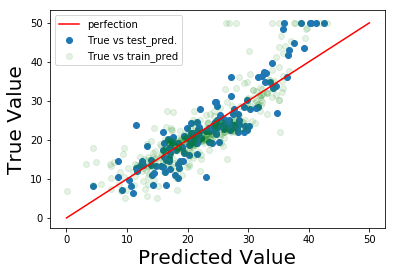

In [24]:
# What does our error look like?
fig,ax=plt.subplots()
fontsize=20
ax.scatter(y_pred_test2,y_test,label='True vs test_pred.')
ax.scatter(y_pred_train2,y_train,label='True vs train_pred',c='g',alpha=0.1)
ax.plot([0,50],[0,50],label='perfection',color='r')
ax.set_xlabel('Predicted Value',fontsize=fontsize)
ax.set_ylabel('True Value',fontsize=fontsize)
leg=ax.legend()

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [25]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [26]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [27]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [29]:
iris['species_num']=iris['species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

In [30]:
# Data shape
iris.shape

(150, 6)

In [31]:
# Data types
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
species_num       int64
dtype: object

In [32]:
# Count of null values by column
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
species_num     0
dtype: int64

In [33]:
# Basic Summary statistics
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species_num
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [34]:
# Number of unique values in each column
for col in iris.columns:
    print(col+': '+str(len(iris[col].unique())))

sepal_length: 35
sepal_width: 23
petal_length: 43
petal_width: 22
species: 3
species_num: 3


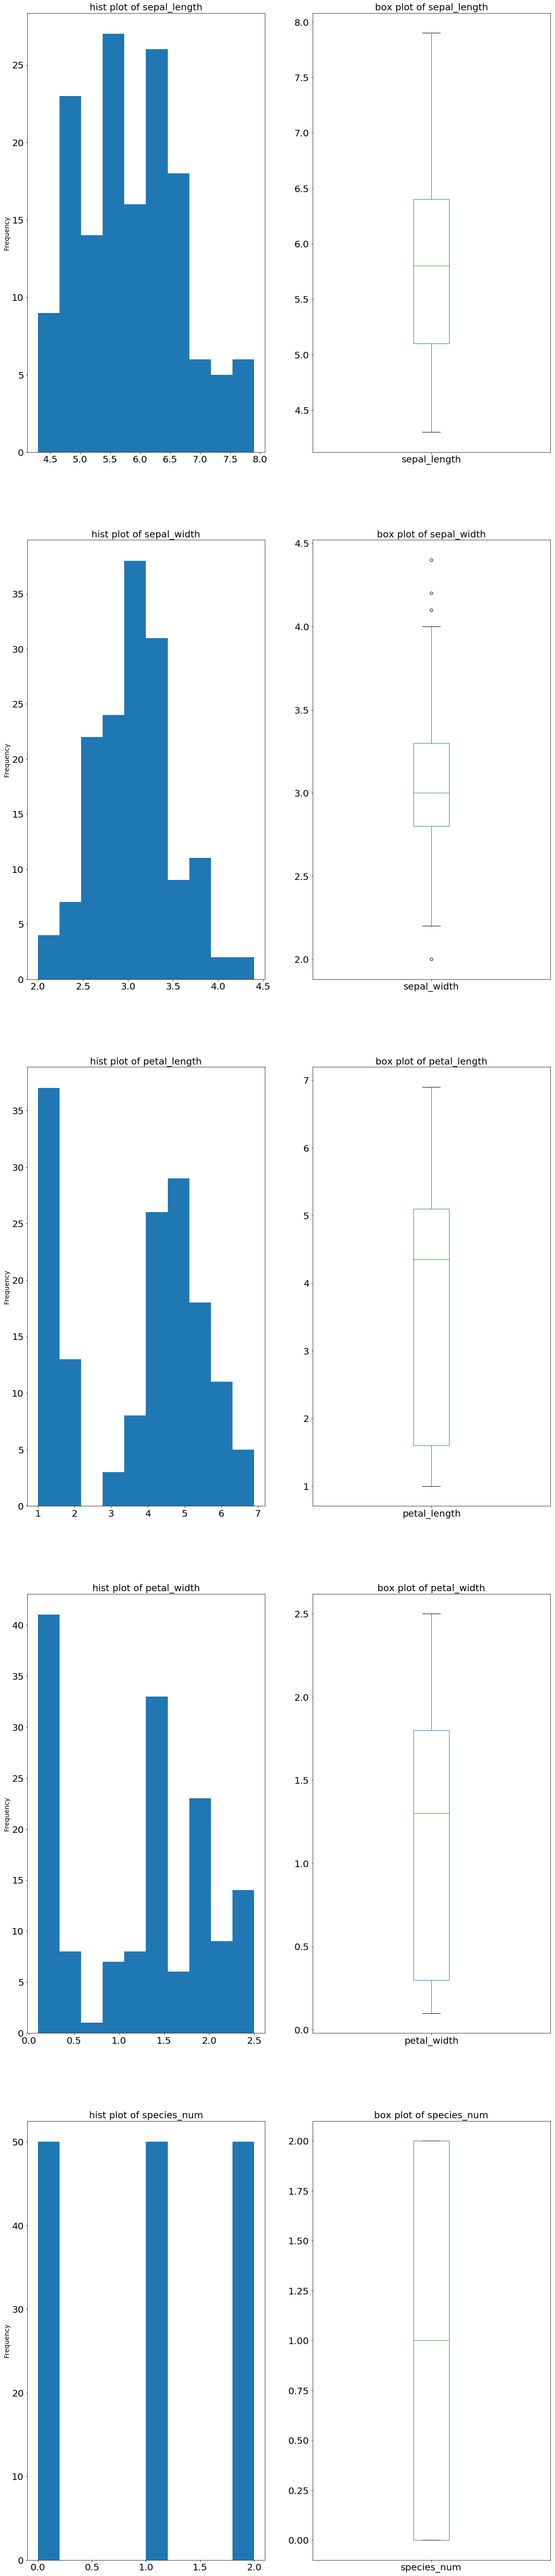

In [35]:
# Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)

plot_types = ['hist','box']
fig, axes = plt.subplots(len(iris.columns)-1,len(plot_types),figsize=(20,100))
fontsize=20

for col,ax_row in zip(iris.columns.drop('species'),axes):
    for ax,plot_type in zip(ax_row,plot_types):
        iris[col].plot(kind=plot_type,ax=ax)
        ax.tick_params(labelsize=fontsize)
        ax.set_title(plot_type+' plot of '+col,fontsize=fontsize)
    

- Get the accuracy of a null model that simply predicts the most common species.

In [36]:
# Find the most common species
iris['species_num'].value_counts()

2    50
1    50
0    50
Name: species_num, dtype: int64

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
# the clases are all even, so the null model will predict species_num of 2
feature_cols = iris.columns.drop(['species_num','species'])
X=iris[feature_cols]
y=iris['species_num']

y_null = np.zeros(len(y))+2

accuracy_score(y_pred=y_null,y_true=y)

0.3333333333333333

- **Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [40]:
# Standardize the features

X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, train_size=0.7,random_state=1)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Generate the model
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Test for accuracy
mse_train = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy').mean()
mse_test = cross_val_score(knn, X_test, y_test, cv=kf, scoring='accuracy').mean()

print(mse_train)
print(mse_test)

C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


0.9436363636363637
0.95


- **How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?**

The null model, unsurprisingly, was only correct a third of the time on the training set. The KNN model was correct about 94% of the time on the training set. This says the bias is lower in the knn model than the null model.

- **How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?**

The training and test accuracy scores are about the same. This indicates a low variance of the knn model.

- **Does your model appear to have more of a bias problem or more of a variance problem? Why?**

The model may have a slight a bias problem, but not a variance problem. This model has trouble differentiating between the species_num 1 and 2 in a certain part of the feature space, but this may be due to irreducible error rather than bias. Values in the same section of the iris feature space yield both species 1 and 2 and the model is unlikely to be able to differentiate between them. The high accuracy score also indicates a lack of a bias problem. The variance is not an issue due to the similar accuracy scores between the training and test sets.

- **Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?**

In [41]:
#decrease k to 1
# Generate the model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Test for accuracy
mse_train = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy').mean()
mse_test = cross_val_score(knn, X_test, y_test, cv=kf, scoring='accuracy').mean()

print(mse_train)
print(mse_test)

0.9445454545454546
1.0


The model became 5% more accurate on the test data by decreasing k from 5 to 1.

- **Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.**

**Tip: Use functions and loops to avoid writing duplicate code.**

The most accurate k for the test data is: 1


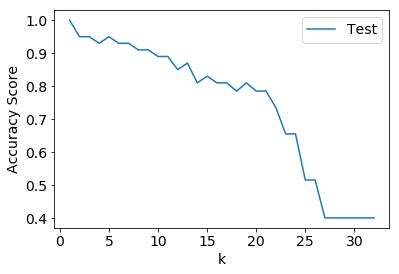

In [42]:
#Find the best k to use by calculating the accuracies for a bunch of ks
test_scores = []
train_scores = []

#X_train, X_test, y_train, y_test = (train_test_split(X, y, random_state=1, shuffle=True))

maxi=33

for k in range(1, maxi):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_accuracy = cross_val_score(knn, X_test, y_test, cv=kf, scoring='accuracy').mean()
    train_accuracy = cross_val_score(knn, X_train, y_train, cv=kf, scoring='accuracy').mean()
    test_scores.append(test_accuracy)
    train_scores.append(train_accuracy)


scores = pd.DataFrame({'train':train_scores,'test':test_scores})
print('The most accurate k for the test data is: '+str(scores['test'].idxmax()+1))    

fig,ax = plt.subplots()
ax.plot(range(1,maxi),test_scores,label='Test')
ax.set_xlabel('k')
ax.set_ylabel('Accuracy Score')
ax.legend();

- **Bonus: Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model.**

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [43]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [44]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Wed, 31 Oct 2018   Prob (F-statistic):          1.59e-321
Time:                        19:50:16   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

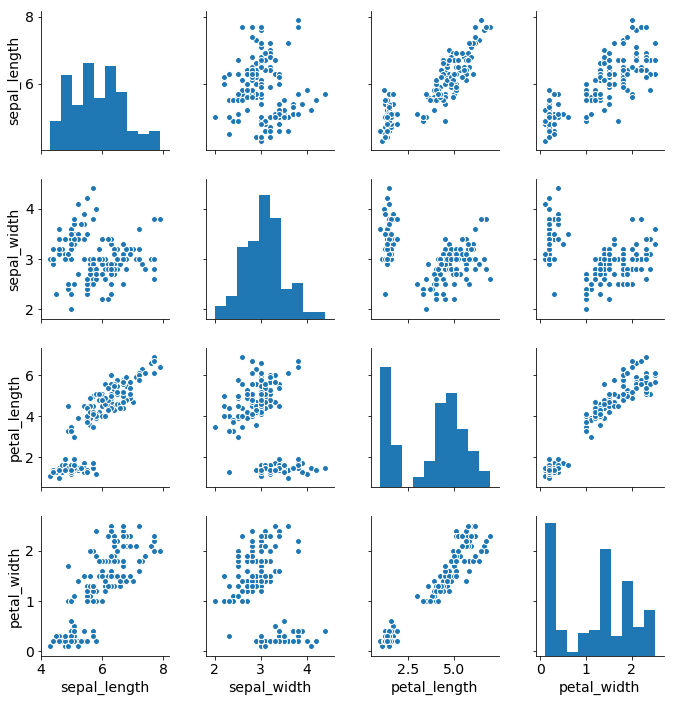

In [45]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [46]:
# Check out Pearson scores


### Demo: Patsy

In [47]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [48]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


C:\Users\Lenovo Thinkpad W520\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.10271810887239174
